## Final Project Submission

Please fill out:
* Student name: Mark Muthengi
* Student pace: full time
* Scheduled project review date/time: 22/03/2024
* Instructor name: Asha Deen
* Blog post URL:



First we start by importing the required modules


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import sqlite3
import csv

pd.options.display.float_format = '{:,.0f}'.format
%matplotlib inline

Then we go through each file

IMDB Database

In [13]:
# Establish a connection to the db
conn = sqlite3.connect('./zippedData/im.db')

# Create a cursor object
cursor = conn.cursor()

# Fetch table names
cursor.execute('SELECT name FROM sqlite_master WHERE type="table";')

# Show the results
table_names = cursor.fetchall()
for table_name in table_names:
  print(table_name)

('movie_basics',)
('directors',)
('known_for',)
('movie_akas',)
('movie_ratings',)
('persons',)
('principals',)
('writers',)


In [14]:
# Check the movie_basics table
query = ('''
SELECT *
FROM movie_basics
''')

pd.read_sql(query, conn).head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80,"Comedy,Drama,Fantasy"


In [15]:
# Check the directors table
query = ('''
SELECT *
FROM directors
''')

pd.read_sql(query, conn).head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [16]:
# Check the known_for table
query = ('''
SELECT *
FROM known_for
''')

pd.read_sql(query, conn).head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [17]:
# Check the movie_akas table
query = ('''
SELECT *
FROM movie_akas
''')

pd.read_sql(query, conn).head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0


In [18]:
# Check the movie_ratings table
query = ('''
SELECT *
FROM movie_ratings
''')

pd.read_sql(query, conn).head()

,movie_id,averagerating,numvotes
0,tt10356526,8,31
1,tt10384606,9,559
2,tt1042974,6,20
3,tt1043726,4,50352
4,tt1060240,6,21


In [19]:
# Check the persons table
query = ('''
SELECT *
FROM persons
''')

pd.read_sql(query, conn).head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,nan,nan,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,nan,nan,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,nan,nan,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,nan,nan,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,nan,nan,"production_designer,art_department,set_decorator"


In [20]:
# Check the principals table
query = ('''
SELECT *
FROM principals
''')

pd.read_sql(query, conn).head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [21]:
# Check the writers table
query = ('''
SELECT *
FROM writers
''')

pd.read_sql(query, conn).head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [22]:
# Close cursor and connection
cursor.close()
conn.close()

Movie Info TSV file

In [23]:
# Specify the file path
movie_info_file_path = './zippedData/rt.movie_info.tsv'

# Open the CSV file and make a dataframe
movies_info_df = pd.read_csv(movie_info_file_path, delimiter='\t', encoding='utf-8')

movies_info_df.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [24]:
movies_info_df[:5]

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


Reviews TSV file

In [25]:
# Specify file path
reviews_file_path = 'zippedData/rt.reviews.tsv'

# Open the CSV file and make a dataframe
reviews_df = pd.read_csv(reviews_file_path, delimiter='\t', encoding='unicode_escape')

reviews_df.columns

Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')

In [26]:
reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


Movie Gross CSV

In [27]:
# Specify file path
movie_gross_file_path = 'zippedData/bom.movie_gross.csv'

# Open the CSV file and make a dataframe
movie_gross_df = pd.read_csv(movie_gross_file_path)

movie_gross_df.columns
movie_gross_df.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,"415,000,000",652000000,2010
1,Alice in Wonderland (2010),BV,"334,200,000",691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,"296,000,000",664300000,2010
3,Inception,WB,"292,600,000",535700000,2010
4,Shrek Forever After,P/DW,"238,700,000",513900000,2010


Movies file

In [28]:
# Specify file path
movies_file_path = 'zippedData/tmdb.movies.csv'

# Read data from file and make a dataframe
movies_df = pd.read_csv(movies_file_path)

movies_df.columns


Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [29]:
movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,34,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,8,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,29,2010-03-26,How to Train Your Dragon,8,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,29,2010-05-07,Iron Man 2,7,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28,1995-11-22,Toy Story,8,10174
4,4,"[28, 878, 12]",27205,en,Inception,28,2010-07-16,Inception,8,22186


Movie budgets file

In [30]:
# Specify file path
movie_budget_file_path = 'zippedData/tn.movie_budgets.csv'

# Read data from file and make a dataframe
movie_budget_df = pd.read_csv(movie_budget_file_path)

movie_budget_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [31]:
movie_budget_df.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


I will make a combined dataset with all the information i will use from the Imdb dataset

In [32]:
# Establish a connection to the db
conn = sqlite3.connect('./zippedData/im.db')

# Create a cursor object
cursor = conn.cursor()

Make a table with the film title, its writers, the genres it falls under, and its rating

In [33]:
query = ('''
SELECT mb.movie_id, mb.primary_title As movie_title, mb.genres, p.primary_name AS writer, mb. start_year, mr.averagerating, mr.numvotes
FROM movie_ratings mr
JOIN writers w ON mr.movie_id = w.movie_id
JOIN persons p ON w.person_id = p.person_id
JOIN movie_basics AS mb ON mb.movie_id = mr.movie_id
''')

imdb_df_writers = pd.read_sql(query, conn)
imdb_df_writers


,movie_id,movie_title,genres,writer,start_year,averagerating,numvotes
0,tt10356526,Laiye Je Yaarian,Romance,Dheeraj Rattan,2019,8,31
1,tt10356526,Laiye Je Yaarian,Romance,Amberdeep Singh,2019,8,31
2,tt1042974,Just Inès,Drama,Marcel Grant,2010,6,20
3,tt1043726,The Legend of Hercules,"Action,Adventure,Fantasy",Renny Harlin,2014,4,50352
4,tt1043726,The Legend of Hercules,"Action,Adventure,Fantasy",Daniel Giat,2014,4,50352
...,...,...,...,...,...,...,...
169297,tt9708284,"I Love You, You're Perfect, Now Change!",Comedy,Cho-Lam Wong,2019,5,19
169298,tt9708284,"I Love You, You're Perfect, Now Change!",Comedy,Joe DiPietro,2019,5,19
169299,tt9722952,O Is Bende,Comedy,Murat Tas,2019,7,6
169300,tt9844256,Code Geass: Lelouch of the Rebellion - Glorifi...,"Action,Animation,Sci-Fi",Gorô Taniguchi,2018,8,24


Make a table with the film title, its directors, the genres it falls under, and its rating

In [34]:
query = ('''
SELECT mb.movie_id, mb.primary_title As movie_title, mb.genres, p.primary_name AS director, mb. start_year, mr.averagerating, mr.numvotes
FROM movie_ratings mr
JOIN directors d ON mr.movie_id = d.movie_id
JOIN persons p ON d.person_id = p.person_id
JOIN movie_basics AS mb ON mb.movie_id = mr.movie_id
''')

imdb_df_directors = pd.read_sql(query, conn)
imdb_df_directors

,movie_id,movie_title,genres,director,start_year,averagerating,numvotes
0,tt10356526,Laiye Je Yaarian,Romance,Sukh Sanghera,2019,8,31
1,tt10356526,Laiye Je Yaarian,Romance,Sukh Sanghera,2019,8,31
2,tt10384606,Borderless,Documentary,Caolan Robertson,2019,9,559
3,tt10384606,Borderless,Documentary,George Llewelyn-John,2019,9,559
4,tt1042974,Just Inès,Drama,Marcel Grant,2010,6,20
...,...,...,...,...,...,...,...
181382,tt9844256,Code Geass: Lelouch of the Rebellion - Glorifi...,"Action,Animation,Sci-Fi",Gorô Taniguchi,2018,8,24
181383,tt9844256,Code Geass: Lelouch of the Rebellion - Glorifi...,"Action,Animation,Sci-Fi",Gorô Taniguchi,2018,8,24
181384,tt9851050,Sisters,"Action,Drama",Prachya Pinkaew,2019,5,14
181385,tt9886934,The Projectionist,Documentary,Abel Ferrara,2019,7,5


Make a table with the film title, its principals, and their job

In [35]:
query = ('''
SELECT mb.movie_id, mb.primary_title As movie_title, p.primary_name AS principal, pr.category, pr.job, pr.characters
FROM movie_ratings mr
JOIN principals pr ON mr.movie_id = pr.movie_id
JOIN persons p ON pr.person_id = p.person_id
JOIN movie_basics AS mb ON mb.movie_id = mr.movie_id
''')

imdb_df_principals = pd.read_sql(query, conn)
imdb_df_principals

,movie_id,movie_title,principal,category,job,characters
0,tt10356526,Laiye Je Yaarian,Roopi Gill,actress,None,"[""Raunak""]"
1,tt10356526,Laiye Je Yaarian,Sandeep Patil,cinematographer,None,None
2,tt10356526,Laiye Je Yaarian,Dheeraj Rattan,writer,None,None
3,tt10356526,Laiye Je Yaarian,Amrinder Gill,actor,None,"[""Garry Randhawa""]"
4,tt10356526,Laiye Je Yaarian,Amberdeep Singh,writer,dialogue,None
...,...,...,...,...,...,...
629593,tt9894098,Sathru,Kathir,actor,None,None
629594,tt9894098,Sathru,Srushti Dange,actress,None,None
629595,tt9894098,Sathru,Marimuthu,actor,None,None
629596,tt9894098,Sathru,G. Dilli Babu,producer,producer,None


In [36]:
# Close cursor and connection
cursor.close()
conn.close()

Next I will work on the tables made from csv files

In [37]:
cleaned_movie_info_df = movies_info_df[['id', 'genre']].dropna()

cleaned_movie_info_df[:25]

,id,genre
0,1,Action and Adventure|Classics|Drama
1,3,Drama|Science Fiction and Fantasy
2,5,Drama|Musical and Performing Arts
3,6,Drama|Mystery and Suspense
4,7,Drama|Romance
5,8,Drama|Kids and Family
6,10,Comedy
7,13,Drama
8,14,Drama
9,15,Action and Adventure|Mystery and Suspense|Scie...


In [38]:
# Pick the required columns and drop any null rows
cleaned_reviews_df = reviews_df[['id', 'fresh']].dropna()

In [39]:
# Show a preview of the rows
cleaned_reviews_df.head()

,id,fresh
0,3,fresh
1,3,rotten
2,3,fresh
3,3,fresh
4,3,fresh


In [40]:
cleaned_movie_gross_df = movie_gross_df.dropna()

In [41]:
cleaned_movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,"415,000,000",652000000,2010
1,Alice in Wonderland (2010),BV,"334,200,000",691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,"296,000,000",664300000,2010
3,Inception,WB,"292,600,000",535700000,2010
4,Shrek Forever After,P/DW,"238,700,000",513900000,2010


In [42]:
movies_df = movies_df.drop(columns=['Unnamed: 0'])
cleaned_movies_df = movies_df[['title', 'id', 'popularity', 'genre_ids']].dropna()

In [43]:
cleaned_movies_df.sort_values('id', ascending=True).head()

,title,id,popularity,genre_ids
117,9 Songs,27,10,"[18, 10402, 10749]"
23872,2001: A Space Odyssey,62,24,"[878, 9648, 12]"
2510,Beverly Hills Cop,90,15,"[28, 35, 80]"
11109,Anatomy of a Murder,93,13,"[80, 18, 9648, 53]"
32,Armageddon,95,16,"[28, 53, 878, 12]"


In [44]:
cleaned_movie_budget_df = movie_budget_df.dropna()

In [45]:
cleaned_movie_budget_df['worldwide_gross'] = cleaned_movie_budget_df['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(float)
cleaned_movie_budget_df = cleaned_movie_budget_df.sort_values(by='worldwide_gross', ascending=False)
cleaned_movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","2,776,345,279"
42,43,"Dec 19, 1997",Titanic,"$200,000,000","$659,363,944","2,208,208,395"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","2,048,134,200"
33,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","1,648,854,864"


I can now begin to explore the dataframes

In [46]:
# Sort dataframe by rating in descending order and return the top 100
imdb_df_writers_sorted = imdb_df_writers.sort_values('averagerating', ascending=False)[:999]
imdb_df_writers_sorted.head()

,movie_id,movie_title,genres,writer,start_year,averagerating,numvotes
146510,tt7227500,Ellis Island: The Making of a Master Race in A...,"Documentary,History",Robert Tutak,2018,10,6
102364,tt10176328,Exteriores: Mulheres Brasileiras na Diplomacia,Documentary,Ana Beatriz Nogueira,2018,10,5
101781,tt6991826,A Dedicated Life: Phoebe Brand Beyond the Group,Documentary,Cristina Duarte,2015,10,5
118403,tt7259300,Calamity Kevin,"Adventure,Comedy",Emre Oran,2019,10,6
111390,tt5089804,Fly High: Story of the Disc Dog,Documentary,Lindsay Thompson,2019,10,7


In [47]:
# I will make a list showing the genres and how many times they appeared in the top 1,000 

# Split every row to have individual genres for count
split_genres = imdb_df_writers_sorted['genres'].str.split(',').explode()

# Count the occurrences of each genre in dataframe
genre_counts = split_genres.value_counts().to_dict()

# Convert the genre counts to a list 
genres_with_count = list(genre_counts.items())[:10]

In [48]:
# Show the list
genres_with_count

[('Documentary', 639),
 ('Drama', 286),
 ('Comedy', 110),
 ('Biography', 85),
 ('History', 65),
 ('Family', 44),
 ('Adventure', 40),
 ('Sport', 38),
 ('Music', 37),
 ('Crime', 27)]

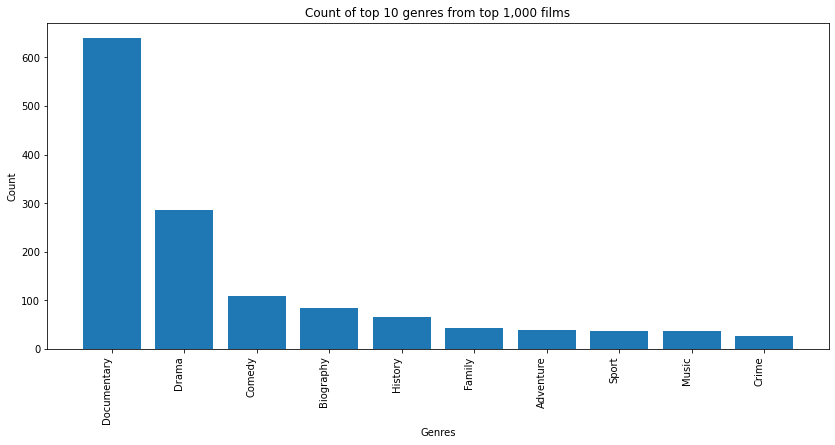

In [49]:
genres = [genre[0] for genre in genres_with_count]
counts = [count[1] for count in genres_with_count]

# Create a bar graph
plt.figure(figsize=(14, 6))
plt.bar(genres, counts)

# Add labels and a title
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Count of top 10 genres from top 1,000 films')


# Rotate the x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Displaying the plot
plt.show()

In [50]:
writer_counts = imdb_df_writers['writer'].value_counts()[:10]

writers_with_count = list(writer_counts.items())

In [51]:
writers_with_count

[('Tony Newton', 489),
 ('Shane Ryan', 247),
 ('Richard Chandler', 173),
 ('Michael J. Epstein', 158),
 ('Sophia Cacciola', 158),
 ('L.M. Harter', 144),
 ('R.J. Wilson', 144),
 ('Brad Twigg', 141),
 ('Kelly Hughes', 133),
 ('James Cullen Bressack', 130)]

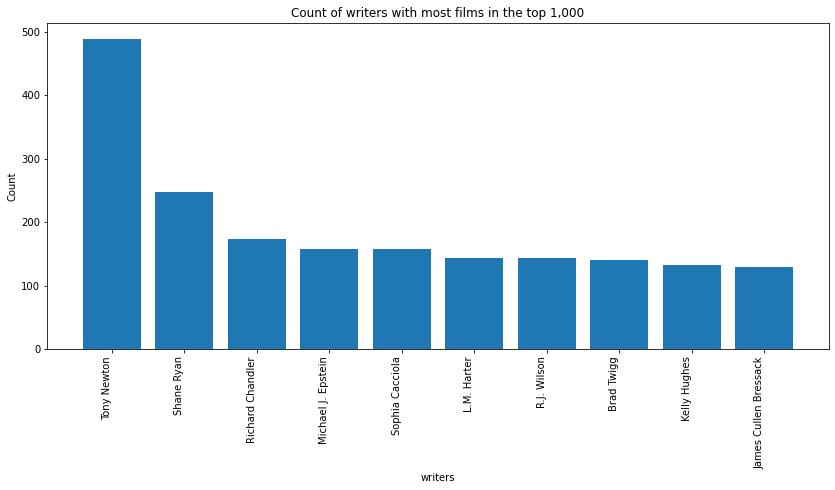

In [52]:
writers = [writer[0] for writer in writers_with_count]
counts = [count[1] for count in writers_with_count]

# Create a bar graph
plt.figure(figsize=(14, 6))
plt.bar(writers, counts)

# Add labels and a title
plt.xlabel('writers')
plt.ylabel('Count')
plt.title('Count of writers with most films in the top 1,000')


# Rotate the x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Displaying the plot
plt.show()


In [53]:
imdb_df_directors_sorted = imdb_df_directors.sort_values('averagerating', ascending=False)[:999]
imdb_df_directors_sorted

,movie_id,movie_title,genres,director,start_year,averagerating,numvotes
64706,tt8730716,Pick It Up! - Ska in the '90s,Documentary,Taylor Morden,2019,10,5
20490,tt1770682,Freeing Bernie Baran,"Crime,Documentary",Daniel Alexander,2010,10,5
15796,tt5390098,The Paternal Bond: Barbary Macaques,Documentary,Michael J. Sanderson,2015,10,5
119364,tt5089804,Fly High: Story of the Disc Dog,Documentary,Lindsay Thompson,2019,10,7
139582,tt5344358,All Around Us,Documentary,Tristan David Luciotti,2019,10,6
...,...,...,...,...,...,...,...
138276,tt3675618,This Is a Wasteland,"Documentary,Music",Dan Fusselman,2013,9,25
78431,tt2035547,La cabane du Bon Dieu,Documentary,Francois Lespes,2011,9,12
136589,tt4760382,Christian Audigier the Vif,Documentary,Didier Beringuer,2017,9,37
109098,tt6819028,Filme B - O Vampiro da Paulista,Comedy,Carla Albuquerque,2017,9,46


In [54]:
director_counts = imdb_df_directors['director'].value_counts()[:10]

director_with_count = list(director_counts.items())
director_with_count

[('Tony Newton', 217),
 ('Jason Impey', 180),
 ('Shane Ryan', 177),
 ('Ruben Rodriguez', 150),
 ('Martin Sonntag', 135),
 ('Sam Mason-Bell', 130),
 ('Gav Chuckie Steel', 119),
 ('Corey Norman', 114),
 ('Dustin Ferguson', 106),
 ('Evan Marlowe', 100)]

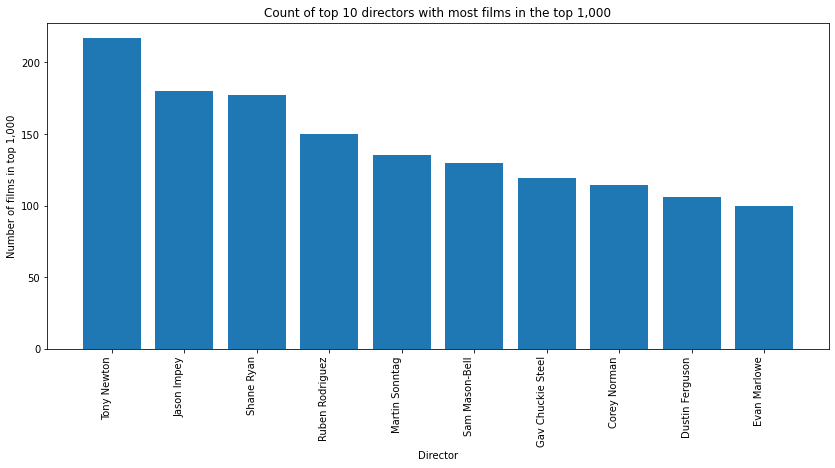

In [55]:
directors = [director[0] for director in director_with_count]
counts = [count[1] for count in director_with_count]

# Create a bar graph
plt.figure(figsize=(14, 6))
plt.bar(directors, counts)

# Add labels and title
plt.xlabel('Director')
plt.ylabel('Number of films in top 1,000')
plt.title('Count of top 10 directors with most films in the top 1,000')


# Rotate the x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Display the plot
plt.show()

In [56]:
# Convert any columns that are not numbers to numbers
cleaned_movie_gross_df['foreign_gross'] = cleaned_movie_gross_df['foreign_gross'].str.replace(',', '').astype(float)

# Add new column to dataframe
cleaned_movie_gross_df['total_gross'] = cleaned_movie_gross_df.apply(lambda row: '{:,.0f}'.format(row['domestic_gross'] + row['foreign_gross']), axis=1)


<ipython-input-56-97a3b5194058>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_movie_gross_df['foreign_gross'] = cleaned_movie_gross_df['foreign_gross'].str.replace(',', '').astype(float)
<ipython-input-56-97a3b5194058>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_movie_gross_df['total_gross'] = cleaned_movie_gross_df.apply(lambda row: '{:,.0f}'.format(row['domestic_gross'] + row['foreign_gross']), axis=1)


In [57]:
cleaned_movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,"415,000,000","652,000,000",2010,"1,067,000,000"
1,Alice in Wonderland (2010),BV,"334,200,000","691,300,000",2010,"1,025,500,000"
2,Harry Potter and the Deathly Hallows Part 1,WB,"296,000,000","664,300,000",2010,"960,300,000"
3,Inception,WB,"292,600,000","535,700,000",2010,"828,300,000"
4,Shrek Forever After,P/DW,"238,700,000","513,900,000",2010,"752,600,000"


In [58]:
cleaned_movie_budget_df.reset_index(inplace=True)
cleaned_movie_budget_df.drop(columns=['index'], inplace=True)
cleaned_movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","2,776,345,279"
1,43,"Dec 19, 1997",Titanic,"$200,000,000","$659,363,944","2,208,208,395"
2,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","2,053,311,220"
3,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","2,048,134,200"
4,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","1,648,854,864"


I am going to take the names of the top 50 grossing films and fetch more information on them in the imdb database

In [69]:
list_of_films_gross = []

for index, row in cleaned_movie_budget_df.iterrows():
  
  if len(list_of_films_gross) < 100:
    film_info = {}
    film_info['Name'] = row['movie']
    film_info['Year'] = int(row['release_date'][-4:])

    film_info['domestic_gross'] = int(row['domestic_gross'].replace(',', '').replace('$', ''))

    film_info['domestic_gross'] = np.nan_to_num(film_info['domestic_gross'])
    film_info['worldwide_gross'] = np.nan_to_num(row['worldwide_gross'])
    
    film_info['Gross'] = film_info['worldwide_gross'] + film_info['domestic_gross']
    list_of_films_gross.append(film_info)

In [79]:
list_of_films_gross

[{'Name': 'Avatar',
  'Year': 2009,
  'domestic_gross': 760507625,
  'worldwide_gross': 2776345279.0,
  'Gross': 3536852904.0},
 {'Name': 'Titanic',
  'Year': 1997,
  'domestic_gross': 659363944,
  'worldwide_gross': 2208208395.0,
  'Gross': 2867572339.0},
 {'Name': 'Star Wars Ep. VII: The Force Awakens',
  'Year': 2015,
  'domestic_gross': 936662225,
  'worldwide_gross': 2053311220.0,
  'Gross': 2989973445.0},
 {'Name': 'Avengers: Infinity War',
  'Year': 2018,
  'domestic_gross': 678815482,
  'worldwide_gross': 2048134200.0,
  'Gross': 2726949682.0},
 {'Name': 'Jurassic World',
  'Year': 2015,
  'domestic_gross': 652270625,
  'worldwide_gross': 1648854864.0,
  'Gross': 2301125489.0},
 {'Name': 'Furious 7',
  'Year': 2015,
  'domestic_gross': 353007020,
  'worldwide_gross': 1518722794.0,
  'Gross': 1871729814.0},
 {'Name': 'The Avengers',
  'Year': 2012,
  'domestic_gross': 623279547,
  'worldwide_gross': 1517935897.0,
  'Gross': 2141215444.0},
 {'Name': 'Avengers: Age of Ultron',
  '

In [72]:
conn = sqlite3.connect('./zippedData/im.db')

In [73]:
top_grossing_films = pd.DataFrame()

query = ('''
SELECT mb.primary_title, mb.original_title, mb.start_year, mb.genres, aka.movie_id, aka.title 
FROM movie_basics mb
JOIN movie_akas aka ON mb.movie_id = aka.movie_id
''')
film_df = pd.read_sql(query, conn)

In [74]:
film_df

,primary_title,original_title,start_year,genres,movie_id,title
0,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",tt0063540,Sangharsh
1,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",tt0063540,Sungharsh
2,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",tt0063540,Sunghursh
3,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",tt0063540,Sunghursh
4,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",tt0063540,Sunghursh
...,...,...,...,...,...,...
331698,Vida em Movimento,Vida em Movimento,2019,Documentary,tt9915436,Life in Movement
331699,Vida em Movimento,Vida em Movimento,2019,Documentary,tt9915436,Vida em Movimento
331700,The Rehearsal,O Ensaio,2019,Drama,tt9916170,O Ensaio
331701,The Rehearsal,O Ensaio,2019,Drama,tt9916170,O Ensaio


In [80]:
full_film_df = pd.DataFrame()
for movie in list_of_films_gross:
  
  for key, value in movie.items():
    name = movie['Name']
    year = movie['Year']
    gross = movie['Gross']

    condition1 = (film_df['primary_title'] == name)
    condition2 = (film_df['original_title'] == name)
    condition3 = (film_df['title'] == name)
    condition4 = (film_df['start_year'] == year)
    combined_conditions = ((condition1 | condition2 | condition3) & condition4)

  film_filtered_df = film_df[combined_conditions]
  film_filtered_df['gross'] = gross
  full_film_df = pd.concat([full_film_df, film_filtered_df])

<ipython-input-80-3ad4b78a2568>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  film_filtered_df['gross'] = gross
<ipython-input-80-3ad4b78a2568>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  film_filtered_df['gross'] = gross
<ipython-input-80-3ad4b78a2568>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [81]:
full_film_df

,primary_title,original_title,start_year,genres,movie_id,title,gross
208888,Avengers: Infinity War,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",tt4154756,Atriebeji: Bezgalibas kars,"2,726,949,682"
208889,Avengers: Infinity War,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",tt4154756,Avengers: Cuoc Chien Vo Cuc,"2,726,949,682"
208890,Avengers: Infinity War,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",tt4154756,Avengers: Infinity War,"2,726,949,682"
208891,Avengers: Infinity War,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",tt4154756,Avengers: Infinity War,"2,726,949,682"
208892,Avengers: Infinity War,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",tt4154756,Avengers: Infinity War,"2,726,949,682"
...,...,...,...,...,...,...,...
27227,Monsters University,Monsters University,2013,"Adventure,Animation,Comedy",tt1453405,Μπαμπούλες πανεπιστημίου,"1,012,076,658"
27228,Monsters University,Monsters University,2013,"Adventure,Animation,Comedy",tt1453405,Монстрлар университетi,"1,012,076,658"
27229,Monsters University,Monsters University,2013,"Adventure,Animation,Comedy",tt1453405,Унiверситет монстрiв,"1,012,076,658"
27230,Monsters University,Monsters University,2013,"Adventure,Animation,Comedy",tt1453405,Университет за таласъми,"1,012,076,658"


In [82]:
# Get the movie_id for the top grossing movies
distinct_values = full_film_df['movie_id'].unique()
finished_list = []

for value in distinct_values:
  name = full_film_df.loc[full_film_df['movie_id'] == value, 'original_title'].iloc[0]
  genres = full_film_df.loc[full_film_df['movie_id'] == value, 'genres'].iloc[0]
  gross = str(full_film_df.loc[full_film_df['movie_id'] == value, 'gross'].iloc[0])

  movie = {'movie_id':value, 'name' : name, 'genres' : genres, 'gross' : gross}
  finished_list.append(movie)
finished_df = pd.DataFrame(finished_list)

In [83]:
finished_df

,movie_id,name,genres,gross
0,tt4154756,Avengers: Infinity War,"Action,Adventure,Sci-Fi",2726949682.0
1,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",2301125489.0
2,tt2820852,Furious Seven,"Action,Crime,Thriller",1871729814.0
3,tt0848228,The Avengers,"Action,Adventure,Sci-Fi",2141215444.0
4,tt2395427,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",1862019831.0
...,...,...,...,...
58,tt0892791,Shrek Forever After,"Adventure,Animation,Comedy",994981460.0
59,tt1877832,X-Men: Days of Future Past,"Action,Adventure,Sci-Fi",981784309.0
60,tt1277953,Madagascar 3: Europe's Most Wanted,"Adventure,Animation,Comedy",963312753.0
61,tt1386697,Suicide Squad,"Action,Adventure,Fantasy",1071159941.0


In [84]:
finished_df_principals = pd.merge(finished_df, imdb_df_principals, on='movie_id')
finished_df_principals

,movie_id,name,genres,gross,movie_title,principal,category,job,characters
0,tt4154756,Avengers: Infinity War,"Action,Adventure,Sci-Fi",2726949682.0,Avengers: Infinity War,Robert Downey Jr.,actor,None,"[""Tony Stark"",""Iron Man""]"
1,tt4154756,Avengers: Infinity War,"Action,Adventure,Sci-Fi",2726949682.0,Avengers: Infinity War,Chris Evans,actor,None,"[""Steve Rogers"",""Captain America""]"
2,tt4154756,Avengers: Infinity War,"Action,Adventure,Sci-Fi",2726949682.0,Avengers: Infinity War,Jack Kirby,writer,based on the Marvel comics by,None
3,tt4154756,Avengers: Infinity War,"Action,Adventure,Sci-Fi",2726949682.0,Avengers: Infinity War,Stan Lee,writer,based on the Marvel comics by,None
4,tt4154756,Avengers: Infinity War,"Action,Adventure,Sci-Fi",2726949682.0,Avengers: Infinity War,Mark Ruffalo,actor,None,"[""Bruce Banner"",""Hulk""]"
...,...,...,...,...,...,...,...,...,...
621,tt1453405,Monsters University,"Adventure,Animation,Comedy",1012076658.0,Monsters University,Robert L. Baird,writer,story by,None
622,tt1453405,Monsters University,"Adventure,Animation,Comedy",1012076658.0,Monsters University,Daniel Gerson,writer,story by,None
623,tt1453405,Monsters University,"Adventure,Animation,Comedy",1012076658.0,Monsters University,Kori Rae,producer,producer,None
624,tt1453405,Monsters University,"Adventure,Animation,Comedy",1012076658.0,Monsters University,Dan Scanlon,director,None,None


In [85]:
finished_df_principals = finished_df_principals.drop(columns=['job', 'characters'])
finished_df_principals

,movie_id,name,genres,gross,movie_title,principal,category
0,tt4154756,Avengers: Infinity War,"Action,Adventure,Sci-Fi",2726949682.0,Avengers: Infinity War,Robert Downey Jr.,actor
1,tt4154756,Avengers: Infinity War,"Action,Adventure,Sci-Fi",2726949682.0,Avengers: Infinity War,Chris Evans,actor
2,tt4154756,Avengers: Infinity War,"Action,Adventure,Sci-Fi",2726949682.0,Avengers: Infinity War,Jack Kirby,writer
3,tt4154756,Avengers: Infinity War,"Action,Adventure,Sci-Fi",2726949682.0,Avengers: Infinity War,Stan Lee,writer
4,tt4154756,Avengers: Infinity War,"Action,Adventure,Sci-Fi",2726949682.0,Avengers: Infinity War,Mark Ruffalo,actor
...,...,...,...,...,...,...,...
621,tt1453405,Monsters University,"Adventure,Animation,Comedy",1012076658.0,Monsters University,Robert L. Baird,writer
622,tt1453405,Monsters University,"Adventure,Animation,Comedy",1012076658.0,Monsters University,Daniel Gerson,writer
623,tt1453405,Monsters University,"Adventure,Animation,Comedy",1012076658.0,Monsters University,Kori Rae,producer
624,tt1453405,Monsters University,"Adventure,Animation,Comedy",1012076658.0,Monsters University,Dan Scanlon,director


In [91]:
split_film_genres = finished_df_principals.drop_duplicates(subset=['movie_id'])
split_film_genres = split_film_genres['genres'].str.split(',').explode()

film_genre_counts = split_film_genres.value_counts().to_dict()

film_genres_with_count = list(film_genre_counts.items())

film_genres_with_count


[('Adventure', 54),
 ('Action', 38),
 ('Comedy', 20),
 ('Sci-Fi', 19),
 ('Animation', 15),
 ('Fantasy', 13),
 ('Family', 6),
 ('Thriller', 6),
 ('Musical', 3),
 ('Drama', 3),
 ('Crime', 2),
 ('Biography', 1),
 ('Horror', 1),
 ('Music', 1)]

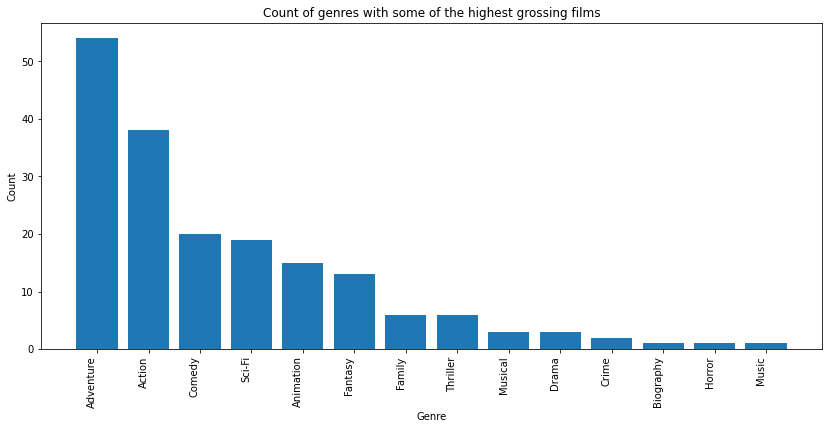

In [92]:
gross_genres = [gross_genre[0] for gross_genre in film_genres_with_count]
gross_counts = [gross_count[1] for gross_count in film_genres_with_count]

# Create a bar graph
plt.figure(figsize=(14, 6))
plt.bar(gross_genres, gross_counts)

# Add labels and a title
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Count of genres with some of the highest grossing films')


# Rotate the x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Displaying the plot
plt.show()

In [93]:
split_film_principals = finished_df_principals.drop_duplicates(subset=['movie_id', 'principal'])
split_film_principals = split_film_principals['principal'].explode()

film_principals_counts = split_film_principals.value_counts().to_dict()

film_principals_with_count = list(film_principals_counts.items())

film_principals_with_count

[('Stan Lee', 7),
 ('Jack Kirby', 6),
 ('Robert Downey Jr.', 6),
 ('Janet Healy', 4),
 ('Ian McKellen', 4),
 ('Kevin Feige', 4),
 ('Chris Evans', 4),
 ('Chris Hemsworth', 3),
 ('Carolynne Cunningham', 3),
 ('Richard Armitage', 3),
 ('Philippa Boyens', 3),
 ('Martin Freeman', 3),
 ('J.R.R. Tolkien', 3),
 ('Dwayne Johnson', 3),
 ('Linda Woolverton', 3),
 ('Michael Arndt', 3),
 ('Cinco Paul', 3),
 ('Fran Walsh', 3),
 ('Johnny Depp', 3),
 ('Mark Ruffalo', 3),
 ('Simon Kinberg', 3),
 ('Vin Diesel', 3),
 ('Chris Pratt', 3),
 ('Ken Daurio', 3),
 ('Ted Elliott', 3),
 ('Pierre Coffin', 3),
 ('Guillermo del Toro', 3),
 ('Peter Jackson', 3),
 ('Bob Kane', 2),
 ('Liam Hemsworth', 2),
 ('Michael Fottrell', 2),
 ('Michael Giacchino', 2),
 ('Adrian Molina', 2),
 ('Bryce Dallas Howard', 2),
 ('Scott Rosenberg', 2),
 ('Gary Scott Thompson', 2),
 ('Daniel Craig', 2),
 ('Anthony Russo', 2),
 ('Nina Jacobson', 2),
 ('Neal Purvis', 2),
 ('Morena Baccarin', 2),
 ('David S. Goyer', 2),
 ('Josh Hutcherson', 2